# **PROJET DE MASTER 1**

## **OBjectif principal: Analyse de données de criminalité; étude de cas sur les données de la base Crime30k.csv**

#### Période: Décembre 2025

# **1. Introduction et problématique**



La sécurité publique constitue un enjeu central pour les grandes villes, où les forces de l'ordre doivent faire face à une criminalité à la fois diffuse dans l'espace et variable dans le temps. Dans ce contexte, disposer d'outils d'analyse permettant de transformer les données de criminalité en décisions opérationnelles devient essentiel pour orienter les patrouilles, cibler les actions de prévention et affecter efficacement les effectifs disponibles.

La base de données Crime30.csv, qui recense les incidents criminels enregistrés dans la ville de Chicago sur une période donnée, offre un support riche pour ce travail. Chaque incident y est décrit par le type d'infraction, les circonstances (lieu, heure, description, contexte domestique), l'issue policière (arrestation ou non), ainsi que par des informations temporelles et spatiales fines (date, heure, quartier, coordonnées). Cette structure permet à la fois une lecture globale des niveaux de criminalité et une analyse plus ciblée des profils d'infractions selon le temps, l'espace et la réponse policière.

Dans ce projet, l'objectif n'est donc pas seulement de “décrire” la criminalité, mais de l'analyser dans une perspective d'aide à la décision : identifier les zones et créneaux horaires les plus exposés, repérer les types d'infractions les plus consommateurs de ressources, et proposer des critères concrets pour allouer de nouveaux agents sur le territoire.




Notre problématique consiste alors à identifier les profils spatio-temporels d'infractions et orienter de manière optimale l'allocation des effectifs policiers (en termes de lieux, de périodes et de compétences).

Afin de résoudre cette problématique, nous allons à travers cette étude, essayer de répondre aux questions suivantes:

* *Quels profils de criminalité urbaine observe-t-on dans la zone étudiée, en combinant l'espace (beats, districts, quartiers), le temps (heure, jour, saison, année), le type d'infraction, le contexte domestique et l'issue policière (arrestation ou non)?*

* *Quels facteurs (type d'infraction, localisation, créneau horaire, contexte domestique, durée de traitement) sont significativement associés à la probabilité d'arrestation et à la charge opérationnelle des services de police?*

* *Comment les types de criminalité et la pression opérationnelle évoluent-ils selon les quartiers et la temporalité (jours, saisons, années), et comment ces dynamiques peuvent-elles être traduites en priorités d'affectation pour les nouveaux agents?*

# **2. Exploration et préparation des données**

In [1]:
# Importattion des libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
from matplotlib.ticker import MaxNLocator

# Chargement des données
data = pd.read_csv('crimes30k.csv')


In [2]:
data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11021273,JA351713,07/10/2017 09:50:00 AM,002XX N MICHIGAN AVE,0820,THEFT,$500 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,...,42.0,32.0,06,NaN,NaN,2017,07/18/2017 03:52:43 PM,NaN,NaN,NaN
1,10928464,JA242180,07/30/2012 11:05:00 AM,027XX W 84TH PL,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,...,18.0,70.0,11,NaN,NaN,2012,04/29/2017 03:49:38 PM,NaN,NaN,NaN
2,10122816,HY311916,12/10/2008 12:00:00 PM,085XX S ESCANABA AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,10.0,46.0,11,NaN,NaN,2008,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,1448084,G177358,03/28/2001 10:00:00 PM,005XX E 33 ST,5001,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,PARKING LOT/GARAGE(NON.RESID.),False,False,...,NaN,NaN,26,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,1793881,G617937,10/14/2001 03:50:00 PM,062XX N MC CORMICK RD,0460,BATTERY,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),True,False,...,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN


In [3]:
data.shape

(30000, 22)

Cette base de données contient 22 variables qui fournissent des informations sur l'enregistrement des actes d'incidents répertoriés et 30 000 lignes représentant des actes enrégistrés. Nous allons devoir visualiser les premières et dernières lignes de la base afin de se faire une idée rapide des différentes données auxquelles nous avons affaire.

In [4]:
# Information sur le type des données de la base
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    30000 non-null  int64  
 1   Case Number           30000 non-null  object 
 2   Date                  30000 non-null  object 
 3   Block                 30000 non-null  object 
 4   IUCR                  30000 non-null  object 
 5   Primary Type          30000 non-null  object 
 6   Description           30000 non-null  object 
 7   Location Description  29955 non-null  object 
 8   Arrest                30000 non-null  bool   
 9   Domestic              30000 non-null  bool   
 10  Beat                  30000 non-null  int64  
 11  District              30000 non-null  int64  
 12  Ward                  27413 non-null  float64
 13  Community Area        27420 non-null  float64
 14  FBI Code              30000 non-null  object 
 15  X Coordinate       


**Type entier (4) :** ID, Beat, District, Year

**Type chaîne de caractères (10) :** Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Updated On, FBI Code, Location

**Type Boolean (2) :** Arrest, Domestic

**Type réel (6) :** Ward, Community Area, Latitude, Longitude, X Coordinate, Y Coordinate

### Conversion de la colonne "Date"

In [5]:
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y %I:%M:%S %p")

#Création des variables temporelles
data["year"]    = data["Date"].dt.year
data["month"]   = data["Date"].dt.month
data["day"]     = data["Date"].dt.day
data["hour"]    = data["Date"].dt.hour
data["weekday"] = data["Date"].dt.day_name()

In [6]:
# Visualisation des premières lignes
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,year,month,day,hour,weekday
0,11021273,JA351713,2017-07-10 09:50:00,002XX N MICHIGAN AVE,0820,THEFT,$500 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,...,2017,07/18/2017 03:52:43 PM,NaN,NaN,NaN,2017,7,10,9,Monday
1,10928464,JA242180,2012-07-30 11:05:00,027XX W 84TH PL,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,...,2012,04/29/2017 03:49:38 PM,NaN,NaN,NaN,2012,7,30,11,Monday
2,10122816,HY311916,2008-12-10 12:00:00,085XX S ESCANABA AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,2008,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2008,12,10,12,Wednesday
3,1448084,G177358,2001-03-28 22:00:00,005XX E 33 ST,5001,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,PARKING LOT/GARAGE(NON.RESID.),False,False,...,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001,3,28,22,Wednesday
4,1793881,G617937,2001-10-14 15:50:00,062XX N MC CORMICK RD,0460,BATTERY,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),True,False,...,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001,10,14,15,Sunday


Il est clair de constater la présence de quelques valeurs manquantes (NaN) à partir de la variable "Location Description" jusqu'à la dernière.

In [7]:
# Visualisation des dernières lignes
data.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,year,month,day,hour,weekday
29995,9995418,HY186092,2015-03-15 23:07:00,059XX S CAMPBELL AVE,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE PORCH/HALLWAY,False,False,...,2015,02/10/2018 03:50:01 PM,41.785660,-87.686257,"(41.785659563, -87.686257097)",2015,3,15,23,Sunday
29996,9998420,HY188618,2015-03-17 18:00:00,068XX S EAST END AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,2015,02/10/2018 03:50:01 PM,41.770648,-87.583787,"(41.770648384, -87.583786515)",2015,3,17,18,Tuesday
29997,9998516,HY188592,2014-11-19 10:14:00,011XX W DIVISION ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,OTHER,False,True,...,2014,02/10/2018 03:50:01 PM,41.903527,-87.656041,"(41.903527055, -87.656040878)",2014,11,19,10,Wednesday
29998,9999014,HY189066,2015-03-17 19:00:00,003XX E WACKER DR,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,2015,02/10/2018 03:50:01 PM,41.887804,-87.618633,"(41.887803629, -87.618633342)",2015,3,17,19,Tuesday
29999,9999860,HY189824,2015-03-11 12:30:00,004XX S HAMLIN BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,2015,02/10/2018 03:50:01 PM,41.875058,-87.720448,"(41.875057848, -87.720447562)",2015,3,11,12,Wednesday


En visualisant des dernières lignes, le constat que nous faisons semble être différent au niveau des données car pas une seule valeur manquante est observée dans les séries colonnes de la base. Il sera alors très utile de comptabiliser l'ensemble des valeurs manquantes afin d'effectuer un nettoyage important.

## A. Nettoyage et préparation des données

In [8]:
# Gestion des valeurs manquantes.
data.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description      45
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                    2587
Community Area          2580
FBI Code                   0
X Coordinate             315
Y Coordinate             315
Year                       0
Updated On                 0
Latitude                 315
Longitude                315
Location                 315
year                       0
month                      0
day                        0
hour                       0
weekday                    0
dtype: int64

Sur les 22 variables, 7 contiennent un nombre important de valeurs manquantes qui pourraient compliquer la manipulation des données dans le cadre de notre analyse. Nous observons 45 valeurs manquantes pour la variable "Location Description", 2 587 pour "Ward", 2 580 pour "Community Area", 315 pour "X Coordinate" et "Y Coordinate", ainsi que 315 pour "Latitude", "Longitude" et "Location". Étant donné le type de ces variables, nous pourrions soit supprimer toutes les lignes contenant des valeurs manquantes, soit remplacer toutes ces valeurs manquantes par des zéros ou par la moyenne de chacune des variables de type entier ou réel. Cette seconde option pourrait avoir un impact très significatif sur les données, car certaines variables sont de type "booléen" et ne pourront pas être remplacées par des zéros. La solution idéale serait donc de nous débarrasser de toutes les valeurs manquantes, même si cela pourrait entraîner la perte d'informations.

In [9]:
# Suppression des valeurs manquantes
data.dropna(inplace=True)
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,year,month,day,hour,weekday
291,11290222,JB230424,2018-04-19 20:55:00,039XX N FREMONT ST,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE - PORCH / HALLWAY,True,False,...,2018,06/17/2020 03:54:43 PM,41.954017,-87.652106,"(41.954016661, -87.652105978)",2018,4,19,20,Thursday
292,24580,JC287360,2019-06-01 06:35:00,043XX N MOZART ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,2019,06/20/2020 03:48:45 PM,41.960145,-87.699654,"(41.960145088, -87.699653761)",2019,6,1,6,Saturday
295,11711231,JC292289,2019-06-02 17:00:00,053XX N SHERIDAN RD,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,2019,06/30/2019 03:56:27 PM,41.979122,-87.655057,"(41.97912164, -87.655056515)",2019,6,2,17,Sunday
296,11714958,JC297015,2019-06-08 00:20:00,015XX S CALIFORNIA BLVD,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,HOSPITAL BUILDING/GROUNDS,True,False,...,2019,06/30/2019 03:56:27 PM,41.860911,-87.695745,"(41.860911204, -87.695744714)",2019,6,8,0,Saturday
297,10016840,HY206110,2015-04-01 09:45:00,058XX W BYRON ST,0810,THEFT,OVER $500,STREET,False,False,...,2015,02/10/2018 03:50:01 PM,41.951259,-87.772934,"(41.951258958, -87.772934481)",2015,4,1,9,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,9995418,HY186092,2015-03-15 23:07:00,059XX S CAMPBELL AVE,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE PORCH/HALLWAY,False,False,...,2015,02/10/2018 03:50:01 PM,41.785660,-87.686257,"(41.785659563, -87.686257097)",2015,3,15,23,Sunday
29996,9998420,HY188618,2015-03-17 18:00:00,068XX S EAST END AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,2015,02/10/2018 03:50:01 PM,41.770648,-87.583787,"(41.770648384, -87.583786515)",2015,3,17,18,Tuesday
29997,9998516,HY188592,2014-11-19 10:14:00,011XX W DIVISION ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,OTHER,False,True,...,2014,02/10/2018 03:50:01 PM,41.903527,-87.656041,"(41.903527055, -87.656040878)",2014,11,19,10,Wednesday
29998,9999014,HY189066,2015-03-17 19:00:00,003XX E WACKER DR,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,2015,02/10/2018 03:50:01 PM,41.887804,-87.618633,"(41.887803629, -87.618633342)",2015,3,17,19,Tuesday


Sur 30 000 lignes de départ, il ne nous reste plus que 27 109. Soit une suppression de 2891 lignes contenant des valeurs manquantes.

In [10]:
# Verification à nouveau
data.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
year                    0
month                   0
day                     0
hour                    0
weekday                 0
dtype: int64

Plus aucune valeur manquante. Nous poursuivons alors notre analyse.

## B. Statistique descriptive

In [11]:
# Statistique descriptive
data.describe()

,ID,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,year,month,day,hour
count,2.710900e+04,27109,27109.000000,27109.000000,27109.000000,27109.000000,2.710900e+04,2.710900e+04,27109.000000,27109.000000,27109.000000,27109.000000,27109.000000,27109.000000,27109.000000
mean,6.981835e+06,2010-03-02 02:29:17.467114240,1187.479951,11.291969,22.734774,37.600686,1.164608e+06,1.885563e+06,2009.660666,41.841578,-87.671469,2009.660666,6.577151,15.607031,13.219152
min,8.810000e+02,2001-03-18 02:00:00,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566,2001.000000,1.000000,1.000000,0.000000
25%,4.290611e+06,2005-09-04 23:07:00,621.000000,6.000000,10.000000,23.000000,1.153041e+06,1.858796e+06,2005.000000,41.767903,-87.713495,2005.000000,4.000000,8.000000,9.000000
50%,7.004248e+06,2009-07-03 15:00:00,1034.000000,10.000000,22.000000,32.000000,1.166124e+06,1.890584e+06,2009.000000,41.855255,-87.665737,2009.000000,7.000000,16.000000,14.000000
75%,9.557795e+06,2014-04-01 19:20:00,1732.000000,17.000000,34.000000,58.000000,1.176364e+06,1.908939e+06,2014.000000,41.905891,-87.628141,2014.000000,9.000000,23.000000,19.000000
max,1.217698e+07,2020-09-26 20:15:00,2535.000000,25.000000,50.000000,77.000000,1.205106e+06,1.951499e+06,2020.000000,42.022537,-87.524615,2020.000000,12.000000,31.000000,23.000000
std,3.001128e+06,NaN,704.999925,6.965503,13.861920,21.611183,1.778059e+04,3.345720e+04,5.190333,0.092089,0.064191,5.190333,3.292064,8.793989,6.719317


Cette statistique descriptive nous permet de nous informer sur la distibrution des varibales de la base. Comme le montrent la sortie ci-dessus.  

# **3. Analyse de données**

L'ojectif générale de toutes les étapes d'analyses mise en place dans cette section consiste à apporter des réponses claires et nettes aux diiférentes questions découlant de la problématique afin d'aider à la prise de décision.

## A. Analyse des types de crimes
Objectif : Identifier les types de crimes les plus fréquents

### Fréquence des types d'incidents


In [12]:
# Analyse de la fréquence des types d'incidents
crime_counts = data['Primary Type'].value_counts()

# Affichage des 10 crimes les plus fréquents
crime_counts.head(10)


Primary Type
THEFT                  5750
BATTERY                4903
CRIMINAL DAMAGE        3163
NARCOTICS              2737
ASSAULT                1740
OTHER OFFENSE          1650
BURGLARY               1574
MOTOR VEHICLE THEFT    1218
DECEPTIVE PRACTICE     1076
ROBBERY                1040
Name: count, dtype: int64

Les résultats montrent que la criminalité est fortement concentrée autour de quelques types de crimes. Les vols (THEFT) et les agressions (BATTERY) sont les catégories les plus fréquentes, suivies par les dégradations (CRIMINAL DAMAGE). Cette répartition indique une prédominance de la délinquance ordinaire, principalement liée aux infractions contre les biens et les personnes.

### Top 10 des types d'incidents les plus fréquents

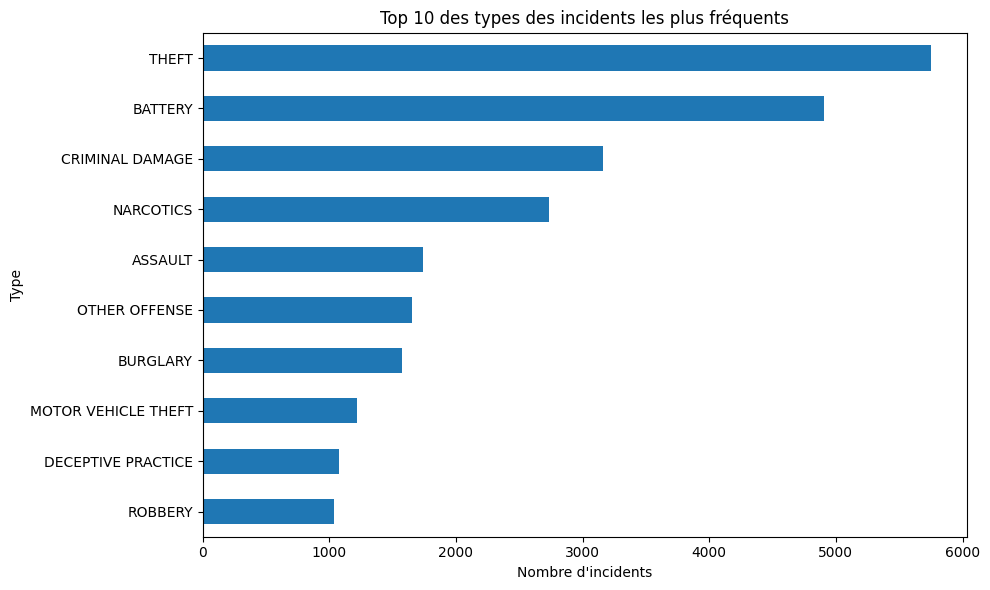

In [13]:
crime_counts.head(10).sort_values().plot(
    kind='barh',
    figsize=(10,6)
)

plt.title("Top 10 des types des incidents les plus fréquents")
plt.xlabel("Nombre d'incidents")
plt.ylabel("Type")
plt.tight_layout()
plt.show()



Le graphique montre que le type d’incident le plus fréquent est THEFT, avec environ 5 750 incidents. Il est suivi par BATTERY, qui compte près de 4 900 incidents. CRIMINAL DAMAGE arrive en troisième position avec un peu plus de 3 100 incidents, suivi par NARCOTICS avec environ 2 700 incidents. Les autres types d’incidents, à savoir ASSAULT, OTHER OFFENSE, BURGLARY, MOTOR VEHICLE THEFT, DECEPTIVE PRACTICE et ROBBERY, présentent chacun des effectifs inférieurs à 2 000 incidents.

### Répartition des cinq infractions les plus fréquentes

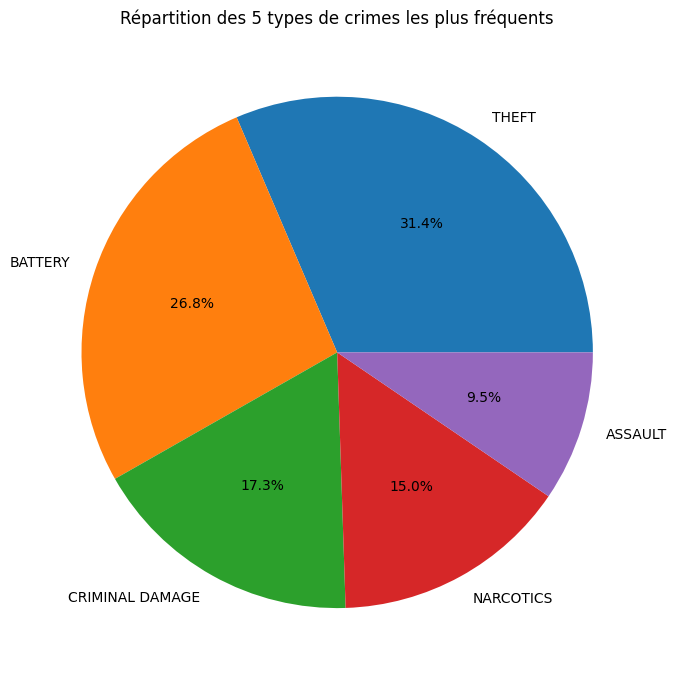

In [14]:
crime_counts.head(5).plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(7,7)
)

plt.title("Répartition des 5 types de crimes les plus fréquents")
plt.ylabel("")
plt.tight_layout()
plt.show()


Le diagramme circulaire indique que THEFT représente environ 31 % des incidents parmi les cinq types les plus fréquents. BATTERY correspond à environ 27 % des incidents. CRIMINAL DAMAGE représente environ 17 %, tandis que NARCOTICS correspond à environ 15 %. ASSAULT est le type d'incident le moins représenté parmi ce groupe, avec environ 9 % des incidents.

### Distribution cimulée des types d'incidents

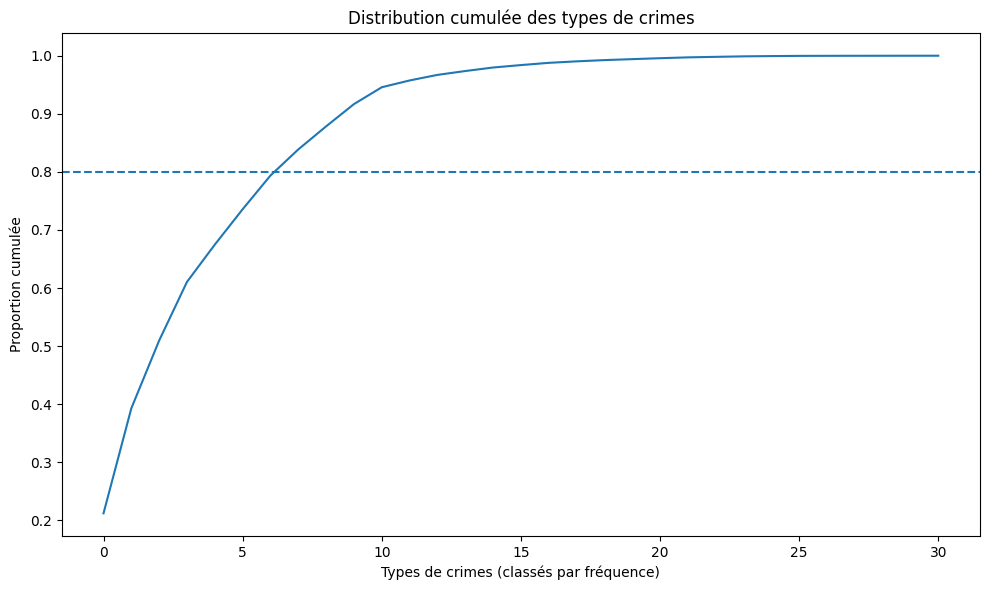

In [15]:
cumulative = crime_counts.cumsum() / crime_counts.sum()

plt.figure(figsize=(10,6))
plt.plot(cumulative.values)
plt.axhline(0.8, linestyle='--')
plt.title("Distribution cumulée des types de crimes")
plt.xlabel("Types de crimes (classés par fréquence)")
plt.ylabel("Proportion cumulée")
plt.tight_layout()
plt.show()

La courbe cumulée montre que la proportion cumulée des incidents augmente rapidement pour les premiers types d'incidents classés par fréquence. Après le premier type d'incident, la proportion cumulée est d'environ 20 %, puis elle atteint environ 60 % après trois types. Le seuil des 80 % est atteint après un nombre limité de types d'incidents, et la proportion cumulée se rapproche de 100 % lorsque l'ensemble des types est pris en compte.

In [16]:
top10_share = crime_counts.head(10).sum() / crime_counts.sum()
top10_share

np.float64(0.9167066287948652)

L’indicateur montre que les dix types d’incidents les plus fréquents représentent environ 91,7 % de l’ensemble des incidents recensés dans le jeu de données.

Le graphique montre que les incidents sont répartis de manière inégale selon leur type. Le type THEFT est le plus fréquent avec environ 5 750 incidents, suivi par BATTERY avec près de 4 900 incidents et CRIMINAL DAMAGE avec un peu plus de 3 100 incidents. Les autres types d'incidents présentent des effectifs plus faibles, généralement inférieurs à 2 000 incidents. La courbe cumulée indique que la proportion des incidents augmente rapidement avec les premiers types classés par fréquence et que le seuil de 80 % est atteint après un nombre limité de catégories. L'indicateur top10_share confirme que les dix types d'incidents les plus fréquents représentent environ 91,7 % de l'ensemble des incidents observés. Cette conclusion résume la distribution des incidents telle qu'elle apparaît dans les données analysées et synthétise les résultats présentés dans les différents graphiques.

## B. Analyse des arrestations : comprendre l'efficacité policière

Nous allons analyser quels sont les crimes qui conduisent le plus souvent à une arrestation.

In [17]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

df = data.copy()

### Création de champs calculés

In [18]:
# Corriger les typages
df['Primary Type'] = df['Primary Type'].astype(str).str.upper().str.strip()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')
df = df[~df['Date'].isna()].copy()

# Création de Champs Calculés
df['incident_hour'] = df['Date'].dt.hour
df['incident_dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['incident_dayofweek'].isin([5,6])
df['year_month'] = df['Date'].dt.to_period('M').astype(str)
df['duration_proxy_hours'] = (df['Updated On'] - df['Date']).dt.total_seconds() / 3600
df.loc[df['duration_proxy_hours'] < 0, 'duration_proxy_hours'] = np.nan


In [19]:
# Robustifier Arrest et éviter dropna global
def to_bool(x):
    if pd.isna(x): return False
    s = str(x).strip().lower()
    return s in ['true','t','1','yes','y']

df['Arrest_bool'] = df['Arrest'].apply(to_bool)

# case_activity_count et has_arrest_case
case_stats = df.groupby('Case Number').agg(
    case_activity_count=('ID','count'),
    case_has_arrest=('Arrest_bool','max')
).reset_index()
df = df.merge(case_stats, on='Case Number', how='left')

In [20]:
# attribuons des scores de 0 à 10 au type d'infraction selon leur gravité (modifiable)
severity_map = {
    'HOMICIDE': 10,
    'CRIMINAL SEXUAL ASSAULT': 10,
    'CRIM SEXUAL ASSAULT': 10,
    'KIDNAPPING': 9,
    'ROBBERY': 8,
    'ASSAULT': 7,
    'BATTERY': 7,
    'WEAPONS VIOLATION': 8,
    'SEX OFFENSE': 9,
    'CRIMINAL DAMAGE': 4,
    'BURGLARY': 6,
    'MOTOR VEHICLE THEFT': 6,
    'THEFT': 4,
    'DECEPTIVE PRACTICE': 3,
    'NARCOTICS': 3,
    'OTHER NARCOTIC VIOLATION': 3,
    'PROSTITUTION': 2,
    'OFFENSE INVOLVING CHILDREN': 9,
    'ARSON': 9,
    'INTIMIDATION': 5,
    'STALKING': 6,
    'PUBLIC PEACE VIOLATION': 2,
    'INTERFERENCE WITH PUBLIC OFFICER': 5,
    'LIQUOR LAW VIOLATION': 1,
    'GAMBLING': 1,
    'OBSCENITY': 1,
    'PUBLIC INDECENCY': 1,
    'CONCEALED CARRY LICENSE VIOLATION': 2,
    'OTHER OFFENSE': 0.5,
    'NON-CRIMINAL': 0.5
}

# Créer agent_category (modifiable) pour la répartition de rôles des agents
mapping = {
 'HOMICIDE':'Major Crimes',
 'CRIMINAL SEXUAL ASSAULT':'Special Victims',
 'CRIM SEXUAL ASSAULT':'Special Victims',
 'SEX OFFENSE':'Special Victims',
 'OFFENSE INVOLVING CHILDREN':'Special Victims',
 'KIDNAPPING':'Major Crimes',
 'ROBBERY':'Patrol/Robbery Unit',
 'ASSAULT':'Patrol/Assault Unit',
 'BATTERY':'Patrol/Assault Unit',
 'INTIMIDATION':'Patrol/Assault Unit',
 'WEAPONS VIOLATION':'Tactical/Weapons Unit',
 'CONCEALED CARRY LICENSE VIOLATION':'Tactical/Weapons Unit',
 'BURGLARY':'Property Crimes',
 'MOTOR VEHICLE THEFT':'Property Crimes',
 'THEFT':'Property Crimes',
 'DECEPTIVE PRACTICE':'Property Crimes',
 'NARCOTICS':'Narcotics Unit',
 'OTHER NARCOTIC VIOLATION':'Narcotics Unit',
 'CRIMINAL DAMAGE':'Patrol/Property Damage',
 'STALKING':'Special Victims',
 'PROSTITUTION':'Vice Unit',
 'GAMBLING':'Vice Unit',
 'LIQUOR LAW VIOLATION':'Vice Unit',
 'PUBLIC INDECENCY':'Vice Unit',
 'OBSCENITY':'Vice Unit',
 'ARSON':'Arson Unit',
 'INTERFERENCE WITH PUBLIC OFFICER':'Public Order',
 'PUBLIC PEACE VIOLATION':'Public Order',
 'NON-CRIMINAL':'Administrative',
 'OTHER OFFENSE':'Other'
}

In [21]:
df['severity_score'] = df['Primary Type'].map(severity_map).fillna(1)
df['agent_category'] = df['Primary Type'].map(mapping).fillna('Other')


# garder top N Primary Types pour lisibilité
top_n = 25
top_types = df['Primary Type'].value_counts().head(top_n).index.tolist()
df_top = df[df['Primary Type'].isin(top_types)].copy()

### Visuel du Barplot arrest_rate par "Primary Type"

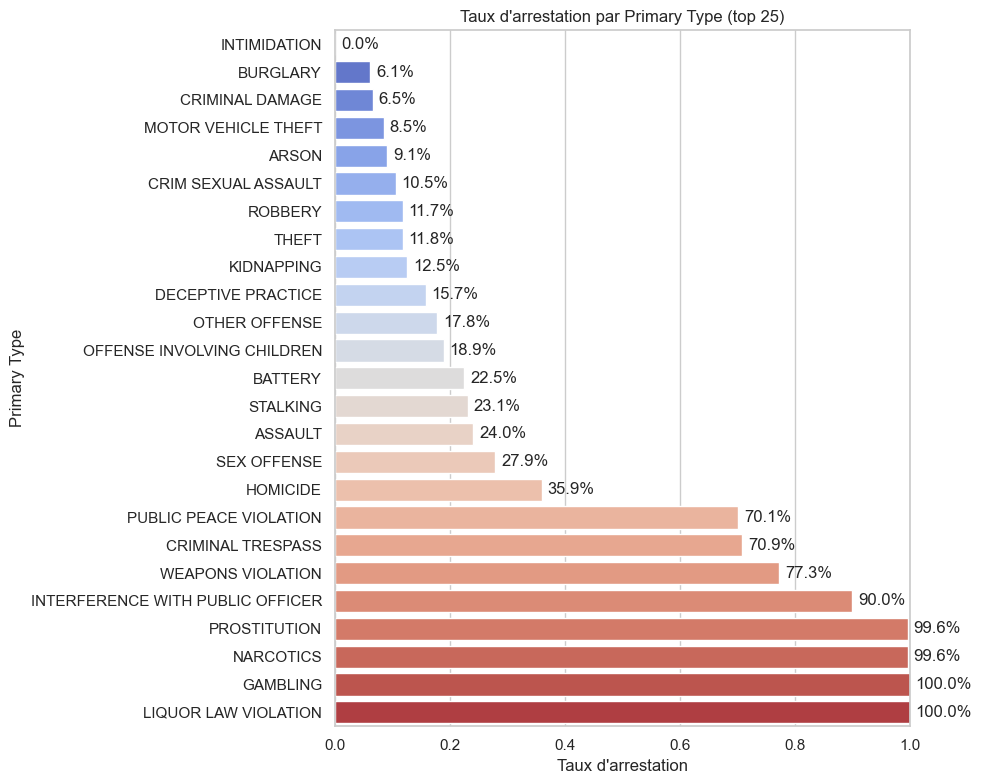

In [22]:
# Barplot arrest_rate par Primary Type (Y)
arrest_by_type = df_top.groupby('Primary Type').agg(
    n_incidents=('ID','count'),
    n_arrests=('Arrest_bool','sum')
).reset_index()
arrest_by_type['arrest_rate'] = arrest_by_type['n_arrests'] / arrest_by_type['n_incidents']
arrest_by_type = arrest_by_type.sort_values('arrest_rate')  # tri ascendant pour mettre faibles en haut

plt.figure(figsize=(10,8))
sns.barplot(x='arrest_rate', y='Primary Type', data=arrest_by_type, palette='coolwarm')
plt.xlabel('Taux d\'arrestation')
plt.ylabel('Primary Type')
plt.title('Taux d\'arrestation par Primary Type (top {})'.format(top_n))
plt.xlim(0,1)
for i, v in enumerate(arrest_by_type['arrest_rate']):
    plt.text(v + 0.01, i, f"{v:.1%}", va='center')
plt.tight_layout()
plt.show()


Le barplot montre les infractions qui enregistrent les plus d'arrestation en bas en rouge, c'est le cas notamment de LIQUOR LAW VIOLATION ET GAMBLING qui occupe la prémière place avec 100% d'arrestation, NARCOTICS ET PROSTITUTION AVEC 99.6%.

Au contraire, les infractions qui n'aboutissent pas à des fortes arrestations sont ceux en haut comme INTIMIDATION AVEC AUCUNE arrestation actif mais aussi ceux en couleur bleue à l'image de BURGLARY, CRIMINAL DOMAGE à seulement 6% d'arrestations. On peut même observer THEFT qui est le top des infractions en terme de volume à seulement 11.8% d'arrestation, c'est un indicateur direct de capacité opérationnelle déployer.

### Heatmap Taux d’arrestation par Primary Type (Y) × Heure (X)

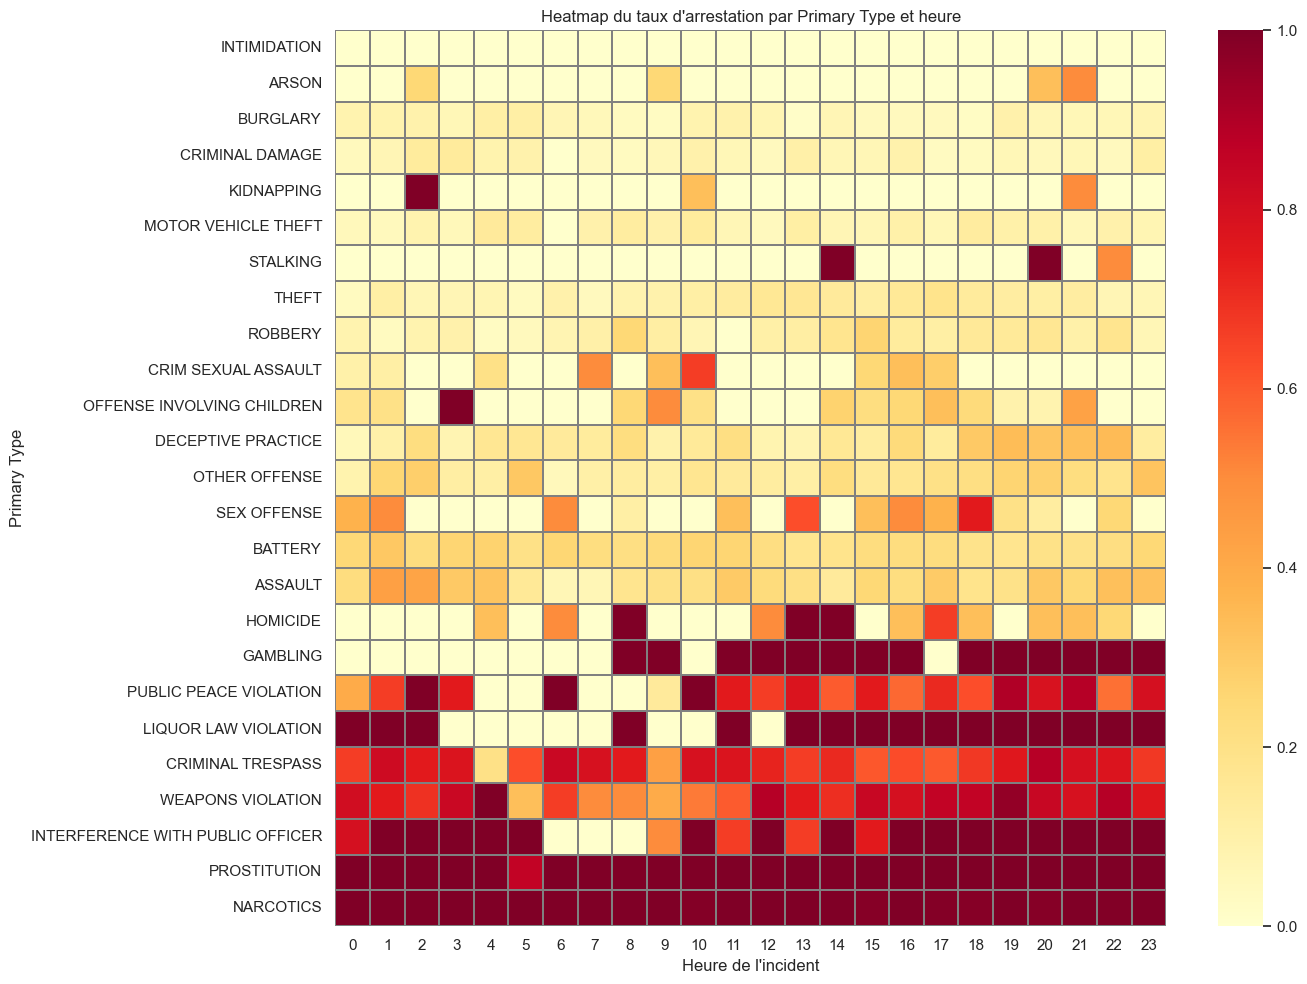

In [23]:
# Heatmap arrest_rate par Primary Type x incident_hour
# Calculer par type et heure
type_hour = df_top.groupby(['Primary Type','incident_hour']).agg(
    n_incidents=('ID','count'),
    n_arrests=('Arrest_bool','sum')
).reset_index()
type_hour['arrest_rate'] = type_hour['n_arrests'] / type_hour['n_incidents']

# Pivot : rows = Primary Type, cols = hour
heat_pivot = type_hour.pivot(index='Primary Type', columns='incident_hour', values='arrest_rate').fillna(0)
# Réordonner Primary Type par arrest_rate moyenne pour lisibilité
order = heat_pivot.mean(axis=1).sort_values().index
heat_pivot = heat_pivot.reindex(order)

plt.figure(figsize=(14,10))
sns.heatmap(heat_pivot, cmap='YlOrRd', vmin=0, vmax=1, linewidths=0.2, linecolor='gray')
plt.title('Heatmap du taux d\'arrestation par Primary Type et heure')
plt.xlabel('Heure de l\'incident')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()


La heatmap révèle les fenêtres horaires où l'efficacité (taux d'arrestation) varie pour chaque type. Elle met en lumière des trous de couverture temporelle : mêmes types, performances différentes selon l'heure.

Creux horaires pour chaque type : creux horaires en jaune clair = plages à revoir, à l'image de LIQUOR LAW VIOLATION, qui couvre des fortes arrestations (creux horaires en couleur rouge), sur l'ensemble des plages horaires à l'exception de 3h à 7h, 9h à 10h et à 12h qui sont en jaune clair.

pour **KIDNAPPING**, si le taux est bas sur l'ensemble des horaires, mais remonte exceptionnellement  à 2h, cela peut refléter des délais d'intervention ou des difficultés à sécuriser la scène la journée.

### Scatter horizontal Arrest rate (X) vs Primary Type (Y) avec gravité et volume

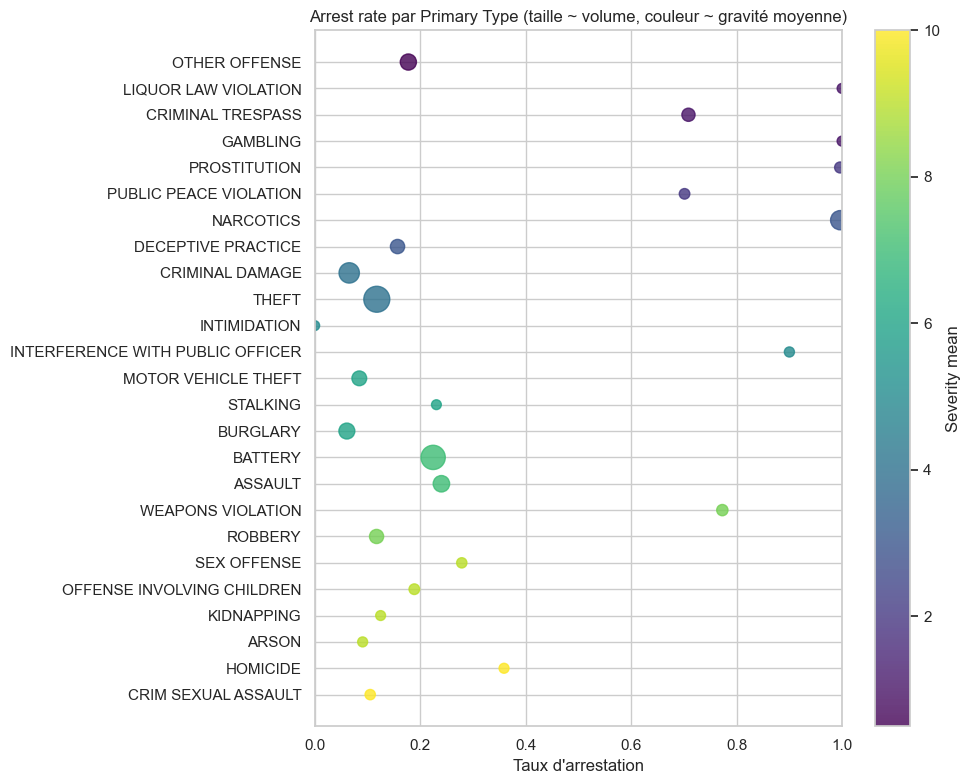

In [24]:
# Scatter horizontal : y = Primary Type, x = arrest_rate ; taille = n_incidents ; couleur = severity_mean
type_stats = df_top.groupby('Primary Type').agg(
    n_incidents=('ID','count'),
    n_arrests=('Arrest_bool','sum'),
    arrest_rate=('Arrest_bool','mean'),
    severity_mean=('severity_score','mean'),
    duration_median=('duration_proxy_hours','median')
).reset_index()

# Filtrer si nécessaire (déjà top types)
plt.figure(figsize=(10,8))
# ordonner y par severity_mean ou arrest_rate pour lisibilité
type_stats = type_stats.sort_values('severity_mean', ascending=False)
y_pos = np.arange(len(type_stats))
sizes = 50 + (type_stats['n_incidents'] - type_stats['n_incidents'].min()) / (type_stats['n_incidents'].max() - type_stats['n_incidents'].min() + 1) * 300
sc = plt.scatter(type_stats['arrest_rate'], y_pos, s=sizes, c=type_stats['severity_mean'], cmap='viridis', alpha=0.8)
plt.yticks(y_pos, type_stats['Primary Type'])
plt.xlabel('Taux d\'arrestation')
plt.title('Arrest rate par Primary Type (taille ~ volume, couleur ~ gravité moyenne)')
cbar = plt.colorbar(sc)
cbar.set_label('Severity mean')
plt.xlim(0,1)
plt.tight_layout()
plt.show()


Ce graphique croise gravité moyenne et taux d'arrestation: Les points en jaune à gauche (haute gravité, faible taux), à l'image de CRIM SEXUAL ASSAULT ET HOMICIDE. Ils sont les plus préoccupants : affaires graves mal traitées. La taille du point montre l'impact (volume).

THEFT est grand mais à gravité moyenne (moins de 20% de gravité) et faible arrest_rate, l'impact opérationnel est élevé.

Les infractions en couleur violette sont moins graves notament de OTHER OFFENSE même s'il a un taux faible, on retouve également LIQUAOR LAW VIOLATION qui est moins grave et qui a un taux élevé (100%) d'arrestations

### Boxplot Distribution duration_proxy_hours par Primary Type

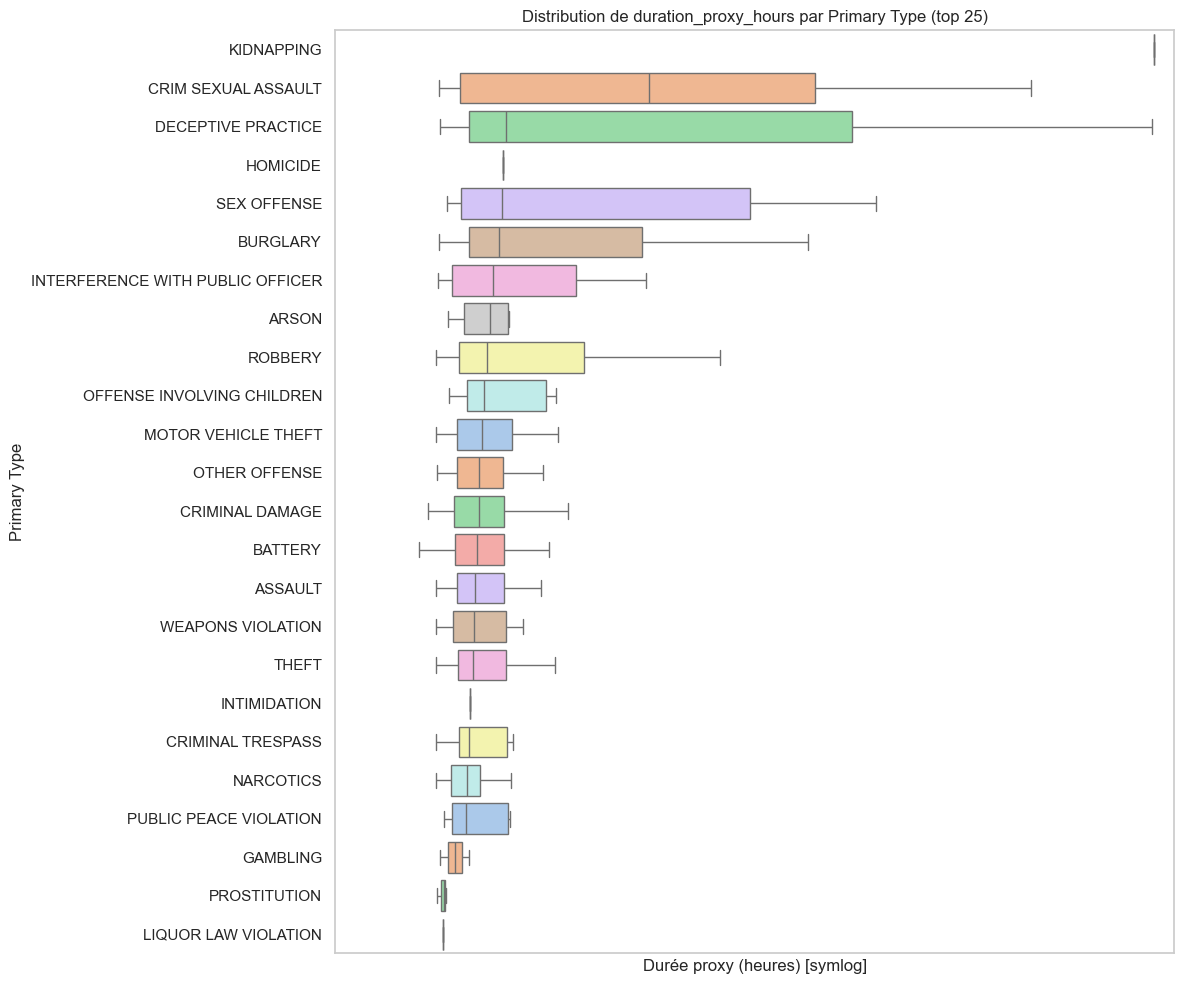

In [25]:
# Boxplot duration_proxy_hours par Primary Type (top types)
dur = df_top[['Primary Type','duration_proxy_hours']].copy()
# Filtrer valeurs valides et plafonner pour lisibilité (ex. <= 720 heures)
dur = dur[dur['duration_proxy_hours'].notna() & (dur['duration_proxy_hours'] > 0) & (dur['duration_proxy_hours'] <= 720)]
# Réordonner Primary Type par médiane duration pour lisibilité
order = dur.groupby('Primary Type')['duration_proxy_hours'].median().sort_values(ascending=False).index

plt.figure(figsize=(12,10))
sns.boxplot(x='duration_proxy_hours', y='Primary Type', data=dur, order=order, showfliers=False, palette='pastel')
plt.xscale('symlog')  # sym log pour gérer petites et grandes valeurs
plt.xlabel('Durée proxy (heures) [symlog]')
plt.ylabel('Primary Type')
plt.title('Distribution de duration_proxy_hours par Primary Type (top {})'.format(top_n))
plt.tight_layout()
plt.show()


Le boxplot montre la variabilité et la médiane du temps d'enquête par type. en haut on retrouve ceux qui ont une médiane élevée (CRIM SEXUAL ASSAULT, DECEPTIVE PRACTICE) avec une large dispersion, indique des dossiers longs ou hétérogènes : besoin d'équipes d'investigation ou d'uniformisation des procédures. Dans cette catégorie on peut retrouver également HOMICIDE avec une mediane élevée mais à courte dispersion.

Médiane élevée = dossiers qui prennent du temps systématiquement (besoin d'enquêteurs).

Grande dispersion = certains dossiers sont rapides, d'autres très longs (cas complexes à prioriser).

BURGLARY a une médiane moyenne en  heures et une large dispersion, cela signifie que beaucoup de dossiers demandent des enquêtes approfondies.

NARCOTICS montre une médiane faible et peu de dispersion, les opérations sont rapides et efficaces.
Maintenir la category tactique actuelle.

### Analyse des arrestations par agent_category

In [26]:
# KPI par agent_category
cat_stats = df.groupby('agent_category').agg(
    n_incidents=('ID','count'),
    n_arrests=('Arrest_bool','sum'),
    arrest_rate=('Arrest_bool','mean'),
    severity_mean=('severity_score','mean'),
    duration_median=('duration_proxy_hours','median'),
    case_activity_mean=('case_activity_count','mean') if 'case_activity_count' in df.columns else ('case_activity_count', lambda x: np.nan)
).reset_index()

# Trier pour lecture
cat_stats = cat_stats.sort_values('arrest_rate', ascending=False)
cat_stats


,agent_category,n_incidents,n_arrests,arrest_rate,severity_mean,duration_median,case_activity_mean
3,Narcotics Unit,2738,2727,0.995982,3.000000,83131.973611,1.0
12,Vice Unit,367,365,0.994550,1.708447,92264.356944,1.0
11,Tactical/Weapons Unit,319,247,0.774295,7.962382,55076.250278,1.0
9,Public Order,234,178,0.760684,2.897436,49722.175278,1.0
4,Other,2436,850,0.348933,0.661330,79423.440278,1.0
2,Major Crimes,63,17,0.269841,9.619048,71987.356111,1.0
5,Patrol/Assault Unit,6666,1519,0.227873,6.993099,74263.793472,1.0
10,Special Victims,420,79,0.188095,9.200000,66128.566944,1.0
7,Patrol/Robbery Unit,1040,122,0.117308,8.000000,69274.000278,1.0
8,Property Crimes,9618,1045,0.108650,4.468705,71109.480139,1.0


### Visualisations rapides par agent_category

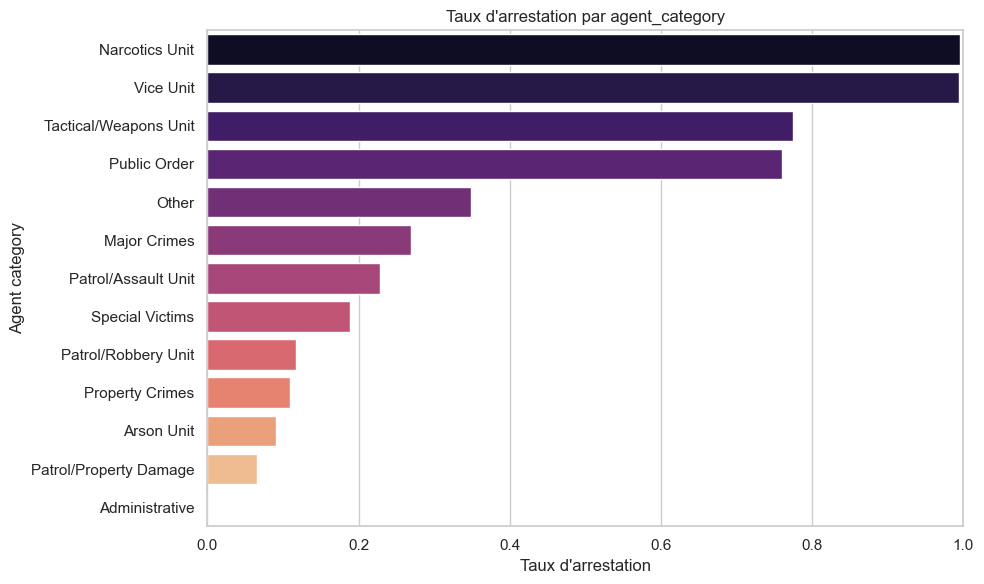

In [27]:
# Barplot arrest_rate par agent_category
plt.figure(figsize=(10,6))
sns.barplot(x='arrest_rate', y='agent_category', data=cat_stats, palette='magma')
plt.xlabel('Taux d\'arrestation')
plt.ylabel('Agent category')
plt.title('Taux d\'arrestation par agent_category')
plt.xlim(0,1)
plt.tight_layout()
plt.show()


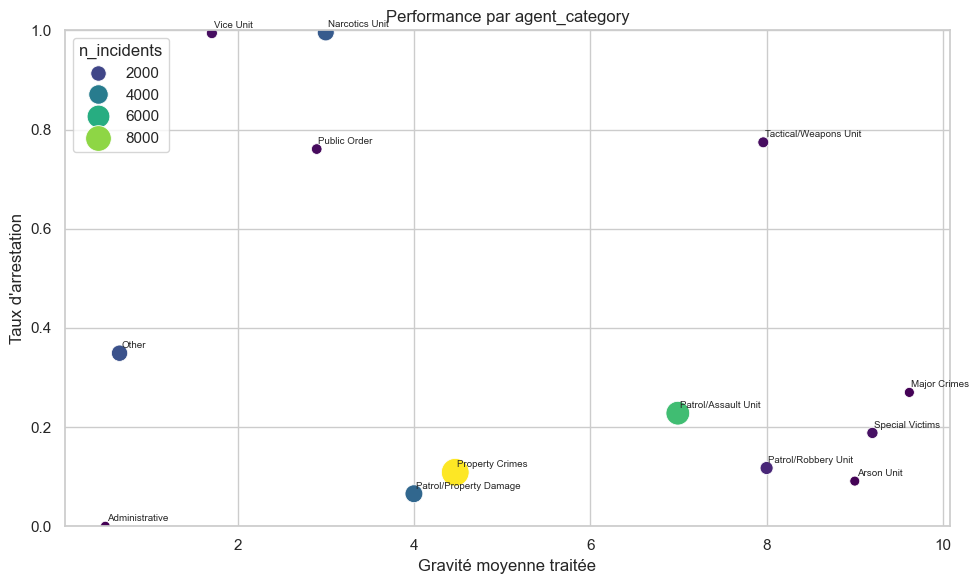

In [28]:
# Scatter severity_mean vs arrest_rate par agent_category
plt.figure(figsize=(10,6))
sns.scatterplot(data=cat_stats, x='severity_mean', y='arrest_rate', size='n_incidents', hue='n_incidents',
                palette='viridis', legend=True, sizes=(50,400))
for _, r in cat_stats.iterrows():
    plt.text(r['severity_mean']+0.02, r['arrest_rate']+0.01, r['agent_category'], fontsize=7)
plt.xlabel('Gravité moyenne traitée')
plt.ylabel('Taux d\'arrestation')
plt.title('Performance par agent_category')
plt.ylim(0,1)
plt.tight_layout()
plt.show()




Les catégories des agents (agent_category) comme Property Crimes avec faible arrest_rate (moins de 20%) mais haute gravité moyenne (couleur jaune) sont à  prioriser.

agent_category Patrol/Assault Unit a une moyenne de gravité élevé (couleur verte) avec un taux d'arrestation faible (moins de 25%), doit être egalement prioritaire

Les catégories comme Administrative, other sont des Categories avec faible gravité (couleur violette) mais aussi faible arrest_rate (moins de 40%), peuvent indiquer des manques d'efficacité sur missions de routine, envisager procédures simplifiées ou équipes dédiées.

Comment utiliser ces résultats pour décider quels agents déployer:

Prioriser recrutement pour catégories qui traitent des infractions graves mais affichent des failles (faible arrest_rate, longue durée).

Renforcer patrouilles nocturnes entere 3h-10h pour ceux dont le heatmap montre chute d'arrest_rate sur ces horaires pour les types d'infraction sensibles

Créer équipes mixtes (Patrol + Special Victims) pour les types qui nécessitent à la fois intervention immédiate et enquête longue.

### Top problematic Primary Types et Agent Categories
Dans le script ci-dessous, nous allons calculer des métriques par Primary Type et par agent_category, crée un score composite de problématicité, liste les catégories/types les plus problématiques avec une justification chiffrée et exporte un CSV d'alertes pour revue opérationnelle.

In [29]:
#  Annotation automatique

# Paramètres
TOP_N = 10  # nombre d'items à lister
MIN_INCIDENTS = 30  # seuil minimal pour considérer une catégorie/type (éviter bruit)

# 1) Métriques par Primary Type
type_stats = df.groupby('Primary Type').agg(
    n_incidents=('ID','count'),
    n_arrests=('Arrest_bool','sum'),
    arrest_rate=('Arrest_bool','mean'),
    severity_mean=('severity_score','mean'),
    duration_median=('duration_proxy_hours','median')
).reset_index()

# Filtrer types peu fréquents
type_stats = type_stats[type_stats['n_incidents'] >= MIN_INCIDENTS].copy()

# Remplacer NaN duration par grand nombre pour signaler problème si absent
type_stats['duration_median'] = type_stats['duration_median'].fillna(type_stats['duration_median'].max())

# 2) Métriques par agent_category
cat_stats = df.groupby('agent_category').agg(
    n_incidents=('ID','count'),
    n_arrests=('Arrest_bool','sum'),
    arrest_rate=('Arrest_bool','mean'),
    severity_mean=('severity_score','mean'),
    duration_median=('duration_proxy_hours','median')
).reset_index()
cat_stats = cat_stats[cat_stats['n_incidents'] >= MIN_INCIDENTS].copy()
cat_stats['duration_median'] = cat_stats['duration_median'].fillna(cat_stats['duration_median'].max())

# 3) Normalisation des composantes pour score composite (0-1)
def normalize_series(s):
    if s.max() == s.min():
        return (s - s.min()) * 0.0
    return (s - s.min()) / (s.max() - s.min())

# Pour problématicité on veut : faible arrest_rate (inverse), haute gravité, longue durée, volume élevé
type_stats['inv_arrest'] = 1 - type_stats['arrest_rate']
type_stats['norm_inv_arrest'] = normalize_series(type_stats['inv_arrest'])
type_stats['norm_severity'] = normalize_series(type_stats['severity_mean'])
type_stats['norm_duration'] = normalize_series(type_stats['duration_median'])
type_stats['norm_volume'] = normalize_series(type_stats['n_incidents'])

# Poids heuristiques (modifiable)
w_inv_arrest = 0.4
w_severity = 0.3
w_duration = 0.2
w_volume = 0.1

type_stats['problem_score'] = (
    w_inv_arrest * type_stats['norm_inv_arrest'] +
    w_severity * type_stats['norm_severity'] +
    w_duration * type_stats['norm_duration'] +
    w_volume * type_stats['norm_volume']
)

# 4) Même logique pour agent_category
cat_stats['inv_arrest'] = 1 - cat_stats['arrest_rate']
cat_stats['norm_inv_arrest'] = normalize_series(cat_stats['inv_arrest'])
cat_stats['norm_severity'] = normalize_series(cat_stats['severity_mean'])
cat_stats['norm_duration'] = normalize_series(cat_stats['duration_median'])
cat_stats['norm_volume'] = normalize_series(cat_stats['n_incidents'])

cat_stats['problem_score'] = (
    w_inv_arrest * cat_stats['norm_inv_arrest'] +
    w_severity * cat_stats['norm_severity'] +
    w_duration * cat_stats['norm_duration'] +
    w_volume * cat_stats['norm_volume']
)

# 5) Lister top problematic Primary Types et agent_categories
top_types_problem = type_stats.sort_values('problem_score', ascending=False).head(TOP_N)
top_cats_problem = cat_stats.sort_values('problem_score', ascending=False).head(TOP_N)

# 6) Générer justifications textuelles automatiques
def justify_type(row):
    parts = []
    parts.append(f"Volume={int(row['n_incidents'])}")
    parts.append(f"ArrestRate={row['arrest_rate']:.1%}")
    parts.append(f"SeverityMean={row['severity_mean']:.2f}")
    parts.append(f"MedianDuration={np.nan if pd.isna(row['duration_median']) else int(row['duration_median'])}h")
    parts.append(f"ProblemScore={row['problem_score']:.3f}")
    # Diagnostic rapide
    if row['arrest_rate'] < type_stats['arrest_rate'].median():
        parts.append("ArrestRate below median")
    if row['severity_mean'] >= type_stats['severity_mean'].quantile(0.75):
        parts.append("High severity")
    if row['duration_median'] >= type_stats['duration_median'].quantile(0.75):
        parts.append("Long duration")
    return "; ".join(parts)

def justify_cat(row):
    parts = []
    parts.append(f"Volume={int(row['n_incidents'])}")
    parts.append(f"ArrestRate={row['arrest_rate']:.1%}")
    parts.append(f"SeverityMean={row['severity_mean']:.2f}")
    parts.append(f"MedianDuration={np.nan if pd.isna(row['duration_median']) else int(row['duration_median'])}h")
    parts.append(f"ProblemScore={row['problem_score']:.3f}")
    if row['arrest_rate'] < cat_stats['arrest_rate'].median():
        parts.append("ArrestRate below median")
    if row['severity_mean'] >= cat_stats['severity_mean'].quantile(0.75):
        parts.append("High severity")
    if row['duration_median'] >= cat_stats['duration_median'].quantile(0.75):
        parts.append("Long duration")
    return "; ".join(parts)

top_types_problem['justification'] = top_types_problem.apply(justify_type, axis=1)
top_cats_problem['justification'] = top_cats_problem.apply(justify_cat, axis=1)

# 7) Export CSVs d'alerte
#top_types_problem[['Primary Type','n_incidents','arrest_rate','severity_mean','duration_median','problem_score','justification']].to_csv('alert_top_types.csv', index=False)
#top_cats_problem[['agent_category','n_incidents','arrest_rate','severity_mean','duration_median','problem_score','justification']].to_csv('alert_top_agent_categories.csv', index=False)

# 8) Affichage synthétique dans notebook
print("Top problematic Primary Types")
display(top_types_problem[['Primary Type','n_incidents','arrest_rate','severity_mean','duration_median','problem_score','justification']])

print("\nTop problematic Agent Categories")
display(top_cats_problem[['agent_category','n_incidents','arrest_rate','severity_mean','duration_median','problem_score','justification']])


Top problematic Primary Types


,Primary Type,n_incidents,arrest_rate,severity_mean,duration_median,problem_score,justification
0,ARSON,44,0.090909,9.0,88995.023611,0.837236,Volume=44; ArrestRate=9.1%; SeverityMean=9.00;...
27,SEX OFFENSE,104,0.278846,9.0,90900.190000,0.765622,Volume=104; ArrestRate=27.9%; SeverityMean=9.0...
2,BATTERY,4903,0.224556,7.0,75140.656944,0.748466,Volume=4903; ArrestRate=22.5%; SeverityMean=7....
5,CRIM SEXUAL ASSAULT,114,0.105263,10.0,55956.072222,0.735717,Volume=114; ArrestRate=10.5%; SeverityMean=10....
26,ROBBERY,1040,0.117308,8.0,69274.000278,0.735323,Volume=1040; ArrestRate=11.7%; SeverityMean=8....
3,BURGLARY,1574,0.060991,6.0,76128.440278,0.732105,Volume=1574; ArrestRate=6.1%; SeverityMean=6.0...
16,MOTOR VEHICLE THEFT,1218,0.084565,6.0,75973.190278,0.715227,Volume=1218; ArrestRate=8.5%; SeverityMean=6.0...
6,CRIMINAL DAMAGE,3163,0.065444,4.0,81355.440278,0.715157,Volume=3163; ArrestRate=6.5%; SeverityMean=4.0...
29,THEFT,5750,0.117739,4.0,71691.440278,0.700677,Volume=5750; ArrestRate=11.8%; SeverityMean=4....
20,OFFENSE INVOLVING CHILDREN,180,0.188889,9.0,62093.197222,0.693486,Volume=180; ArrestRate=18.9%; SeverityMean=9.0...



Top problematic Agent Categories


,agent_category,n_incidents,arrest_rate,severity_mean,duration_median,problem_score,justification
1,Arson Unit,44,0.090909,9.000000,88995.023611,0.852952,Volume=44; ArrestRate=9.1%; SeverityMean=9.00;...
5,Patrol/Assault Unit,6666,0.227873,6.993099,74263.793472,0.726776,Volume=6666; ArrestRate=22.8%; SeverityMean=6....
7,Patrol/Robbery Unit,1040,0.117308,8.000000,69274.000278,0.725804,Volume=1040; ArrestRate=11.7%; SeverityMean=8....
2,Major Crimes,63,0.269841,9.619048,71987.356111,0.717010,Volume=63; ArrestRate=27.0%; SeverityMean=9.62...
10,Special Victims,420,0.188095,9.200000,66128.566944,0.714300,Volume=420; ArrestRate=18.8%; SeverityMean=9.2...
8,Property Crimes,9618,0.108650,4.468705,71109.480139,0.709485,Volume=9618; ArrestRate=10.9%; SeverityMean=4....
6,Patrol/Property Damage,3163,0.065444,4.000000,81355.440278,0.693107,Volume=3163; ArrestRate=6.5%; SeverityMean=4.0...
4,Other,2436,0.348933,0.661330,79423.440278,0.442756,Volume=2436; ArrestRate=34.9%; SeverityMean=0....
11,Tactical/Weapons Unit,319,0.774295,7.962382,55076.250278,0.367855,Volume=319; ArrestRate=77.4%; SeverityMean=7.9...
3,Narcotics Unit,2738,0.995982,3.000000,83131.973611,0.263529,Volume=2738; ArrestRate=99.6%; SeverityMean=3....



Priorité 1 : Audit immédiat

On peut facilement observer que le type le plus problématique pour la police est ARSON avec un scrore  élevé à 0.837% de ProblemScore qui est combinaison d’un faible arrest_rate, haute gravité, durée longue et volume significatif, suivi par SEX OFFENSE avec 0.77% et BATTERY,CRIM SEXUAL ASSAULT,ROBBERY,BURGLARY qui sont autour de 0.74%. ces types doivent être de priorité maximale pour action corrective.

Priorité 2 : Renforts spécialisés

On peut faire le même constat pour agent_category, le categorie d'agent le moins efficace est Arson Unit avec 0.85% de ProblemScore suivis de Patrol/Assault Unit, Patrol/Robbery Unit avec 0.72%. pour ces équipes, nous devons envisager de renforts d'enquête ou formation spécialisée.

## **C. Analyse des violences domestiques**

L'objectif ici est de comparer les crimes domestiques et non domestiques afin d'identifier leurs spécificités en termes de proportion, de types de crimes, de localisation et d'arrestations.


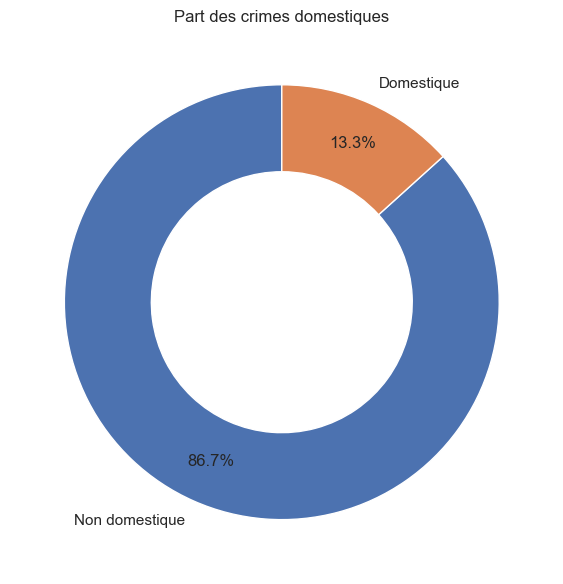

In [30]:
dom_counts = data["Domestic"].value_counts()

plt.figure(figsize=(6,6))

plt.pie(
    dom_counts,
    labels=["Non domestique", "Domestique"],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    wedgeprops=dict(width=0.4, edgecolor='white')
)

plt.title("Part des crimes domestiques")
plt.tight_layout()
plt.show()


La répartition globale des crimes selon leur caractère domestique ou non domestique met clairement en évidence que la très grande majorité des infractions ont lieu en dehors du cadre familial. En effet, près de 87 % des crimes enregistrés sont non domestiques, contre environ 13 % de crimes domestiques. Cela signifie que, dans l'ensemble de la base étudiée, les faits criminels se produisent principalement dans l'espace public ou dans des contextes non familiaux. Toutefois, même s'ils sont moins nombreux, les crimes domestiques ne doivent pas être négligés. Ils représentent une part significative des situations observées et soulèvent des enjeux sociaux importants, notamment en raison de leur caractère souvent plus intime et de leur impact potentiel sur les victimes.

### Part des crimes domestiques par type de crime (en %)

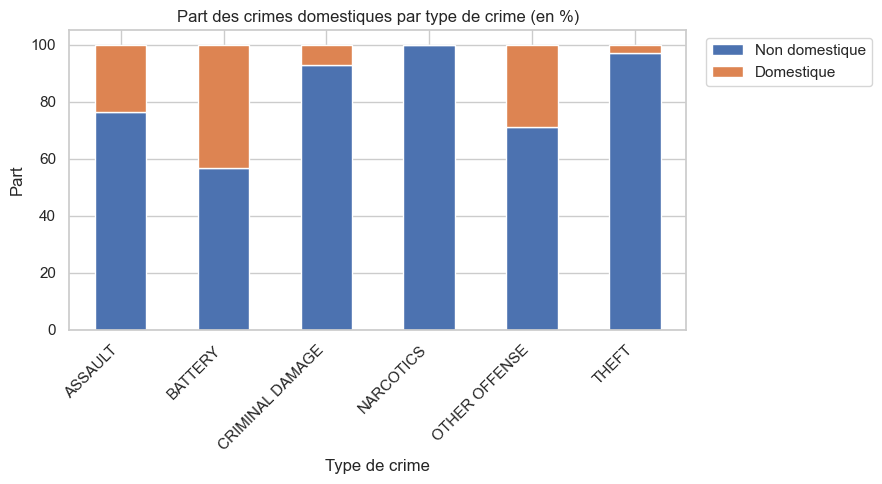

In [31]:
top_types = data["Primary Type"].value_counts().head(6).index
df_top = data[data["Primary Type"].isin(top_types)]

tab = pd.crosstab(
    df_top["Primary Type"],
    df_top["Domestic"],
    normalize="index"
) * 100

tab.plot(kind="bar", stacked=True, figsize=(9,5))

plt.title("Part des crimes domestiques par type de crime (en %)")
plt.ylabel("Part")
plt.xlabel("Type de crime")
plt.xticks(rotation=45, ha="right")

plt.legend(
    ["Non domestique", "Domestique"],
    loc="upper left",
    bbox_to_anchor=(1.02, 1)
)

plt.tight_layout()
plt.show()



La répartition des crimes selon leur caractère domestique et non domestique met en évidence des différences marquées selon le type d'infraction. Nous observons que certaines catégories présentent une proportion relativement élevée de crimes domestiques. C'est notamment le cas des BATTERY (violences physiques), pour lesquelles environ 40 % des faits sont commis dans un cadre domestique. Les ASSAULT (agressions) affichent également une part domestique significative, représentant environ 25 % des cas, tandis que les OTHER OFFENSE (autres infractions) comptent près de 30 % de crimes domestiques.

À l'inverse, d'autres types d'infractions sont très majoritairement non domestiques. Les THEFT (vols) ne sont domestiques que dans environ 3 % des situations, et les CRIMINAL DAMAGE (dégradations) dans environ 7 % des cas. Les infractions liées aux NARCOTICS (stupéfiants) apparaissent quant à elles comme presque exclusivement non domestiques, avec une part domestique quasi nulle.


### Variabilité de la population des incidents de type domestiques par secteur

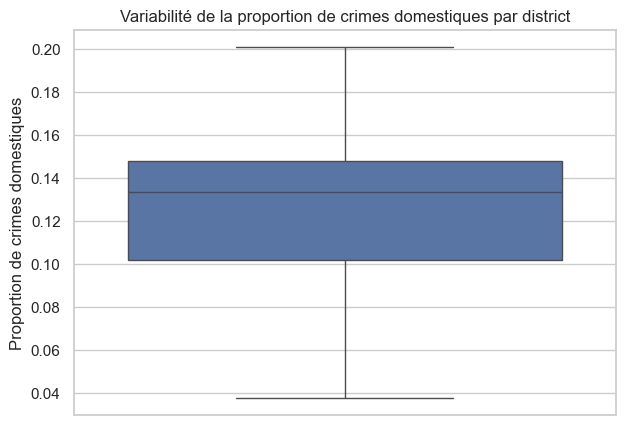

In [32]:
district_dom = data.groupby("District")["Domestic"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.boxplot(y=district_dom["Domestic"])
plt.title("Variabilité de la proportion de crimes domestiques par district")
plt.ylabel("Proportion de crimes domestiques")
plt.show()


Ce graphique souligne que, dans la plupart des districts, la part de crimes liés à la violence domestique est assez semblable. En général, on est autour de 1 crime sur 7% ou 8% qui est domestique. Certains districts se distinguent un peu : dans quelques-uns, la violence domestique pèse beaucoup moins dans la criminalité totale, et dans d'autres, elle est nettement plus présente.

### Barres amplifiées normalisées

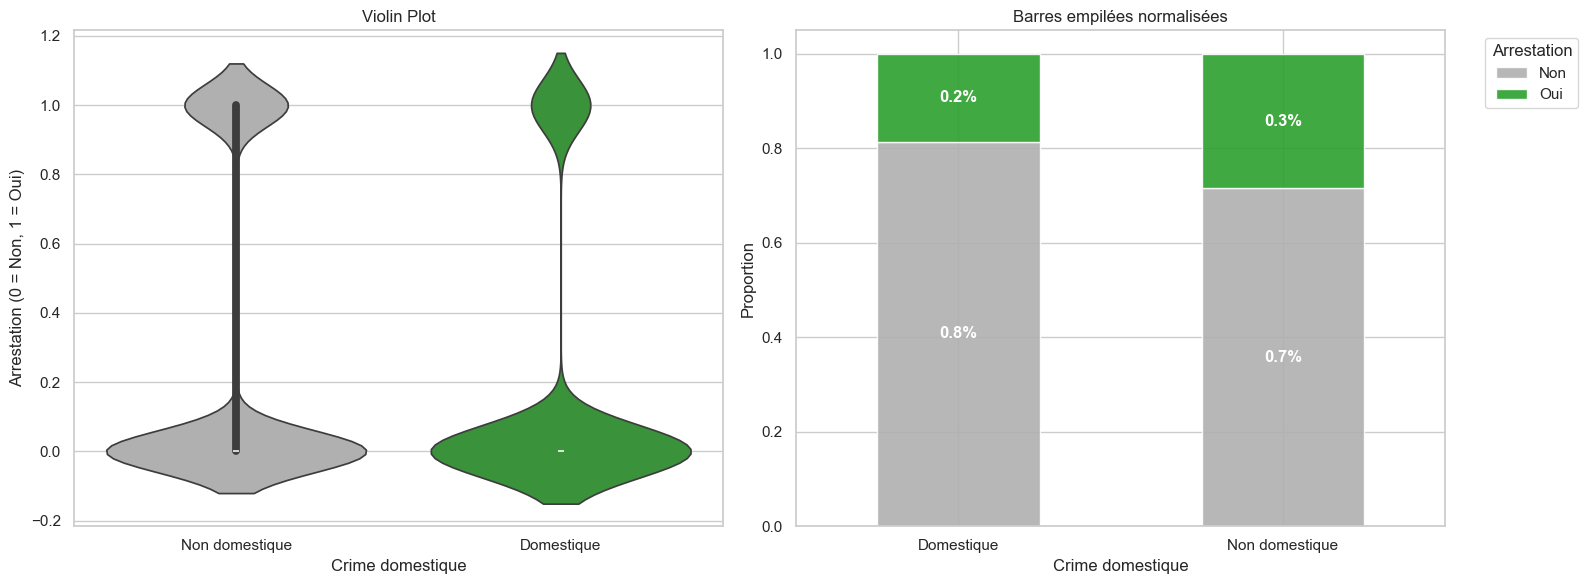

In [33]:
data["Domestic_cat"] = data["Domestic"].map({
    False: "Non domestique",
    True: "Domestique"
})

data["Arrest_cat"] = data["Arrest"].map({
    False: "Non",
    True: "Oui"
})

palette_domestic = {
    "Non domestique": "#b0b0b0",
    "Domestique": "#2ca02c"
}

palette_arrest = {
    "Non": "#b0b0b0",
    "Oui": "#2ca02c"
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(
    x="Domestic_cat",
    y="Arrest",
    data=data,
    ax=ax1,
    palette=palette_domestic
)

ax1.set_title("Violin Plot")
ax1.set_xlabel("Crime domestique")
ax1.set_ylabel("Arrestation (0 = Non, 1 = Oui)")

cross_tab = pd.crosstab(data["Domestic_cat"],data["Arrest_cat"],normalize="index")

cross_tab.plot(kind="bar",stacked=True,ax=ax2,color=[palette_arrest["Non"], palette_arrest["Oui"]],alpha=0.9,rot=0)

ax2.set_title("Barres empilées normalisées")
ax2.set_ylabel("Proportion")
ax2.set_xlabel("Crime domestique")
for container in ax2.containers:
    ax2.bar_label(
       container,
      fmt="%.1f%%",
     label_type="center",
    color="white",
    weight="bold"
    )

ax2.legend(
    title="Arrestation",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


Le premier graphique (violin plot) compare les arrestations selon que le crime soit domestique ou non. On observe que, dans les deux cas, la majorité des valeurs se situe autour de 0, ce qui signifie que la plupart des crimes ne donnent pas lieu à une arrestation. Les valeurs autour de 1, correspondant aux crimes ayant conduit à une arrestation, sont beaucoup moins fréquentes. Visuellement, les deux distributions se ressemblent fortement, ce qui rend difficile l'identification d'une différence claire entre crimes domestiques et non domestiques. De plus, comme la variable « arrestation » est binaire, ce type de graphique reste peu lisible et peut prêter à confusion.

Le second graphique, en barres empilées normalisées, permet une lecture beaucoup plus claire. Il montre que, dans les deux cas, une grande majorité des crimes n'aboutit pas à une arrestation. Toutefois, on observe une légère différence entre les deux catégories : la proportion d'arrestations est légèrement plus élevée pour les crimes non domestiques que pour les crimes domestiques. Cette différence reste modérée, mais elle devient visible grâce à ce type de représentation.

## **D. Analyse spatiale**

Dans cette section, nous souhaitons identifier les zones à risque représentant le niveau d'être exposé à un nombre important d'incidents criminels.

In [34]:
def ajouter_annotations_chicago(ax=None):
    #Ajoute les annotations textuelles des régions de Chicago
    #et les lignes de démarcation (Madison St et State St) sur le graphique.

    # Si aucun axe n'est spécifié, on prend l'axe courant (plt.gca())
    if ax is None:
        ax = plt.gca()

    # Définition des coordonnées des régions
    regions = {
        "North Side": (-87.68, 41.95),
        "South Side": (-87.68, 41.72),
        "West Side": (-87.75, 41.88),
        "Downtown / Loop": (-87.62, 41.88)
    }

    # Style des boîtes de texte
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)

    # Ajout du texte pour chaque région
    for name, (lon, lat) in regions.items():
        ax.text(lon, lat, name, fontsize=12, fontweight='bold', bbox=props, ha='center')

    # Ajout des lignes de démarcation (Madison St et State St)
    ax.axhline(y=41.882, color='black', linestyle='--', alpha=0.3, linewidth=1)
    ax.axvline(x=-87.629, color='black', linestyle='--', alpha=0.3, linewidth=1)

#### Carte de Chaleur des Crimes (Zones à Risque)

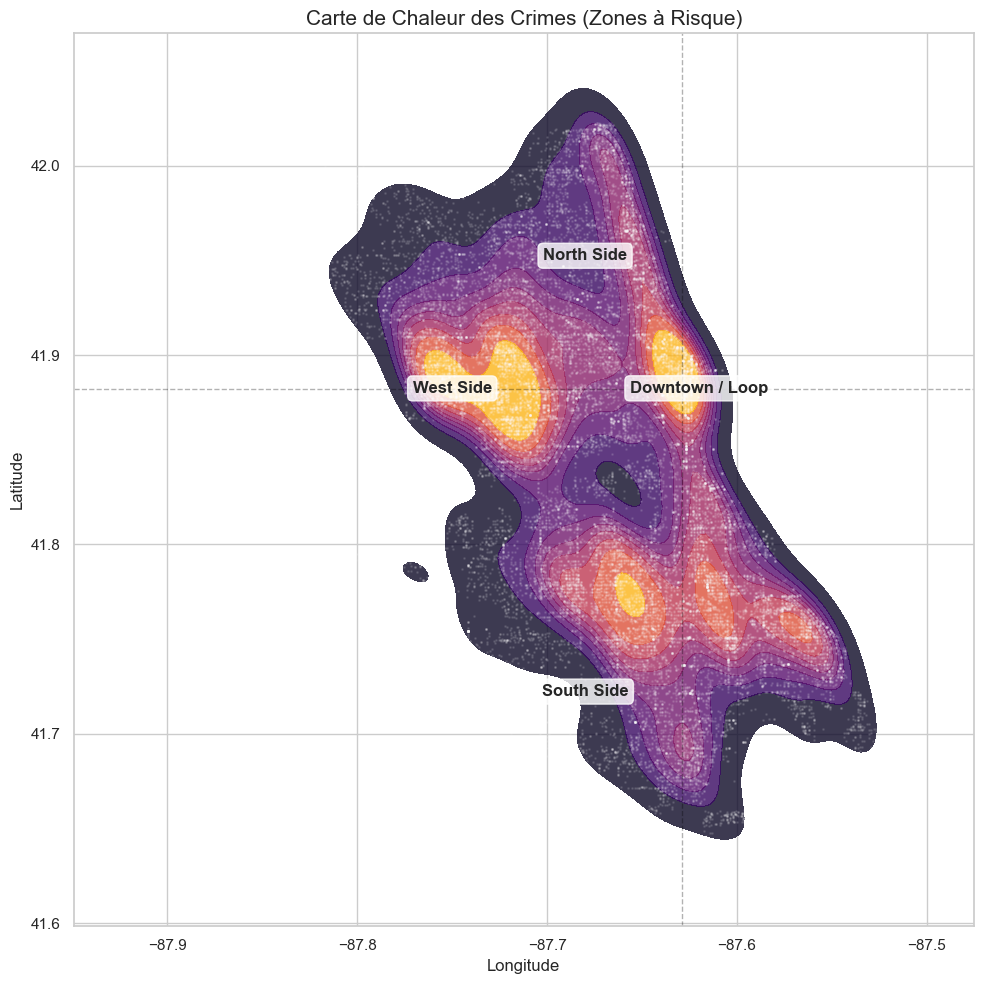

In [35]:
# Objectif : Visualiser les "Hotspots" (zones chaudes) comme une carte météo
plt.figure(figsize=(10, 10))

# Chicago est environ entre Lat 41.6 et 42.1, Long -87.9 et -87.5
df_map = data[
    (data['Latitude'] > 41.60) & (data['Latitude'] < 42.05) &
    (data['Longitude'] > -87.9) & (data['Longitude'] < -87.5)
]

# Création de la carte de densité
# fill=True remplit les contours, cmap='inferno'
sns.kdeplot(
    x=df_map['Longitude'],
    y=df_map['Latitude'],
    fill=True,
    cmap='inferno',
    thresh=0.05,
    alpha=0.8
)

ajouter_annotations_chicago()

plt.scatter(df_map['Longitude'], df_map['Latitude'], s=1, c='white', alpha=0.1)
plt.title('Carte de Chaleur des Crimes (Zones à Risque)', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.tight_layout()
plt.show()


Ce graphique permet de visualiser la concentration des incidents criminels sur le territoire de CHICAGO avec les 4 grandes regions (North Side, South Side, West Side, Downtown/Loop).

* Les zones jaunes (Cœur des foyers) : Représentent les densités les plus élevées. Ce sont les points chauds (hotspots) où la fréquence des crimes est la plus intense.

* Les zones rouges et violettes : Indiquent une densité moyenne à élevée. C'est la zone de transition autour des foyers principaux.

* Les zones sombres (Bleu/Gris) : Indiquent une présence criminelle plus faible



West Side (Foyer Principal) :

*C'est la zone qui présente la tache jaune la plus large et la plus intense. Cela suggère que le "West Side" est actuellement la zone la plus critique en termes de volume ou de fréquence d'incidents rapportés sur cette période.*

Downtown/Loop (Foyer Central) :

*On observe une concentration très dense (jaune vif) mais géographiquement plus restreinte. Cela correspond au centre-ville économique.*

South Side :

*Ce secteur présente une vaste zone de chaleur (orange/jaune). Bien que le "cœur" jaune semble légèrement moins compact que celui du West Side, la zone rouge environnante est très étendue, indiquant une criminalité persistante sur un large périmètre géographique.*

North Side :

*Cette zone est active (teintes violettes et rouges) mais ne présente pas l'intensité des trois autres secteurs. La criminalité y est présente mais moins concentrée ou moins fréquente que dans le Sud et l'Ouest.*

#### Analyse de la Distribution Spatiale par les 2 Top Type de Crime

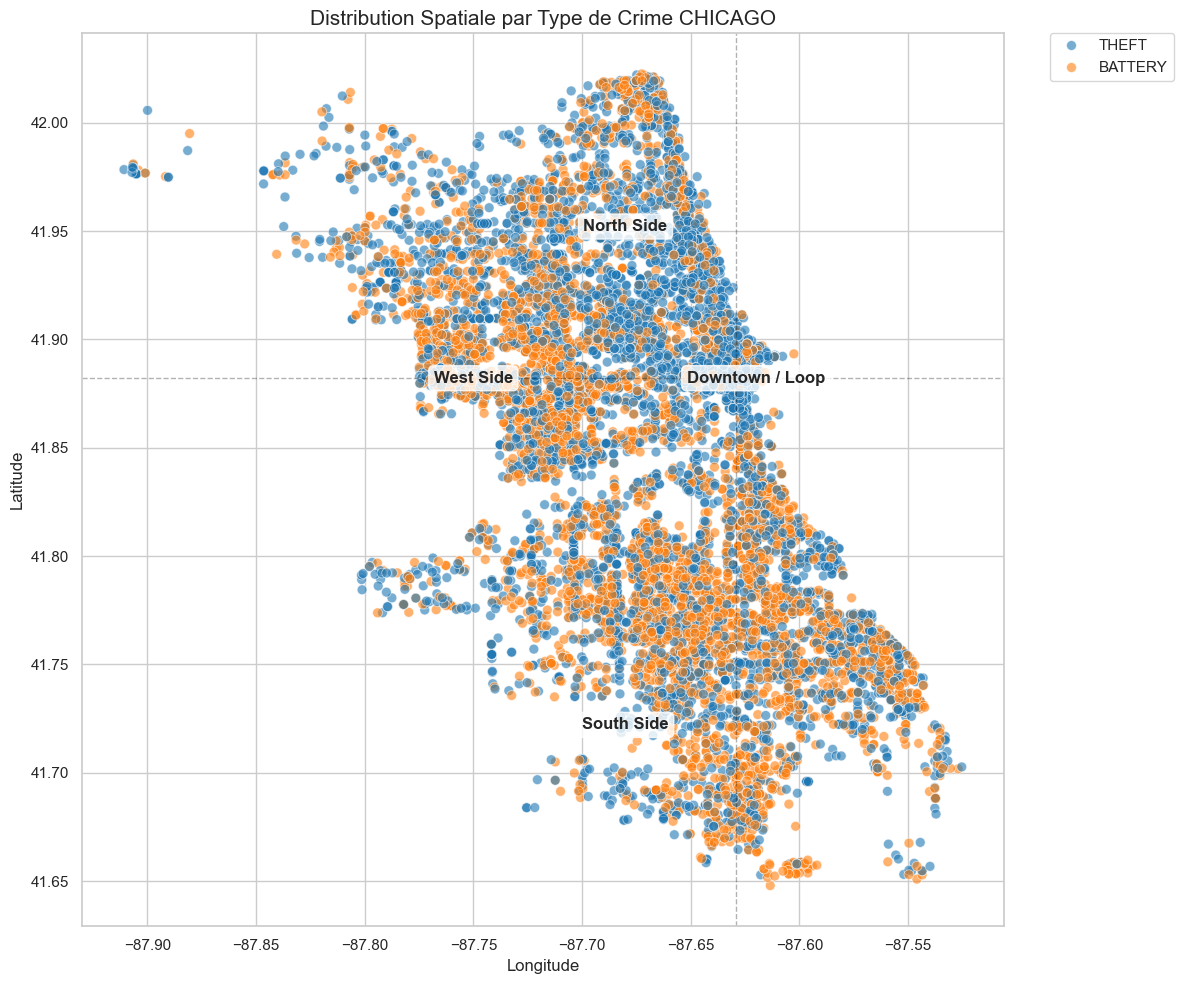

In [36]:
#Scatter Plot par Type de Crime
#Objectif : Voir si certains types de crimes sont localisés différemment
plt.figure(figsize=(12, 10))
title_suffix = "CHICAGO"
#On garde que les 3 premiers types de crimes les plus fréquents
top_crimes = data['Primary Type'].value_counts().head(2).index
df_filtered = data[data['Primary Type'].isin(top_crimes)]
palette = sns.color_palette("tab10", n_colors=len(top_crimes))
sns.scatterplot(
    data= df_filtered,
    x='Longitude',
    y='Latitude',
    hue='Primary Type',
    alpha=0.6,
    palette= palette,
    s=50
)
#Ajout des annotations pour les grandes régions de Chicago
ajouter_annotations_chicago()

plt.title(f'Distribution Spatiale par Type de Crime {title_suffix}', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.show()

Nous constatons que la zone (Downtown/Loop) est l'épicentre du Vol
saturée de points bleus (Theft). Les points oranges (Battery) y sont quasi invisibles ou noyés dans la masse bleue.
Ce qui implique que le centre-ville, zone touristique et commerciale à forte densité de population, est le terrain de prédilection pour les crimes contre les biens (vols à la tire, vols à l'étalage). La violence physique y est proportionnellement beaucoup plus faible.

West Side et South Side : Les foyers de Violence,
c'est là que la concentration de points oranges (Battery) est la plus forte et la plus dense. Bien que les points bleus soient présents (le vol existe partout), la couleur orange domine visuellement ces secteurs par rapport au reste de la carte. Ces quartiers concentrent la majorité des crimes contre les personnes. Contrairement au centre-ville, le risque principal dans ces zones « à risque » (identifiées sur la carte précédente) est lié à l'intégrité physique plutôt qu'aux biens matériels.

North Side : Une criminalité mixte mais modérée, la distribution est plus diffuse. On y voit un mélange des deux couleurs, mais avec une densité nettement inférieure aux trois autres zones.
Le Nord présente un profil de criminalité plus standard, sans l'hyper-spécialisation du centre (vol) ni l'intensité violente de l'Ouest et du Sud.

#### Analyse de la Distribution Spatiale des Type de Crime sur les 2 dernieres années

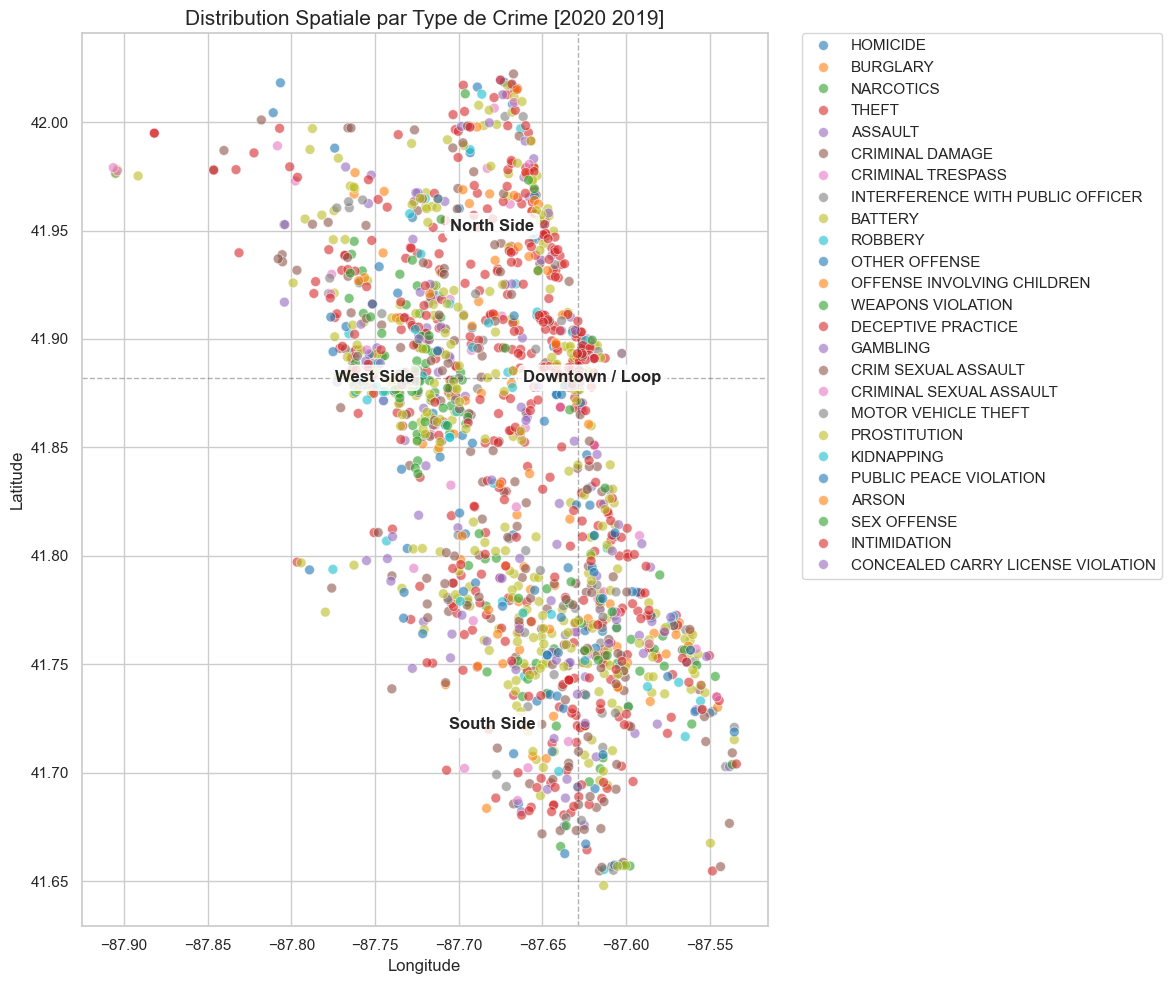

In [37]:
#Scatter Plot par Type de Crime
#Objectif : Voir si certains types de crimes sont localisés différemment
plt.figure(figsize=(12, 10))
title_suffix = "CHICAGO"
#Recuperer les types de crimes
type_crimes = data['Primary Type'].value_counts().index
#Recuperer les deux dernieres années
lastyear = data['year'].sort_values(ascending=False).drop_duplicates().head(2)
df_filtered = data[data['year'].isin(lastyear)]
palette = sns.color_palette("tab10", n_colors=len(type_crimes))
sns.scatterplot(
    data= df_filtered,
    x='Longitude',
    y='Latitude',
    hue='Primary Type',
    alpha=0.6,
    palette= palette,
    s=50
)
#Ajout des annotations pour les grandes régions de Chicago
ajouter_annotations_chicago()

plt.title(f'Distribution Spatiale par Type de Crime {lastyear.values}', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.show()

Cette carte inclut l'ensemble des types de crimes (Homicides, Narcotiques, Armes, etc.) pour les périodes récentes, affine cette observation en introduisant la notion de diversité criminelle :

* Homogénéité du Centre (Downtown) : Même avec toutes les catégories affichées, le Centre reste dominé par des teintes rouges/roses (Theft / Deceptive Practice). La criminalité y est monothématique. Au niveau des regions West & South Side on constate une hétérogénéité des Zones à Risque Contrairement au centre, les foyers du Sud et de l'Ouest ressemblent à une mosaïque. On y observe une forte présence de : Narcotics (Vert) : Très présents dans le West Side, indiquant des zones de trafic.

* Weapons Violation/Homicide (Points dispersés) : Ces crimes graves se superposent aux zones d'agressions (Battery), créant un environnement sécuritaire beaucoup plus complexe et volatile.

* La Frontière Nord : On remarque une zone de transition nette au niveau du North Side, où la diversité des couleurs s'estompe pour laisser place majoritairement aux crimes contre les biens.

**Synthèse** :
L'analyse croisée des types de crimes confirme une spécialisation géographique de la délinquance. Si le Centre-Ville est l'épicentre d'une criminalité opportuniste et commerciale (vols), les quartiers Ouest et Sud souffrent d'une poly-criminalité beaucoup plus lourde. Ces zones cumulent non seulement les violences physiques (Battery), mais aussi les infractions liées aux stupéfiants et aux armes, créant un écosystème criminel complexe qui nécessite des réponses policières radicalement différentes de celles appliquées au Nord de la ville.